In [33]:
import argparse
import glob
import numpy as np
import os
import time
import skimage.io, skimage
import torch

In [7]:

import skimage.io, skimage
from run_superpoint import *
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from skimage.transform import resize
img_sim1 = resize(skimage.io.imread("/home/diganta/Documents/IITKGP/Project/SuperPointPretrainedNetwork-master/21-40/33/Sim1.jpg", as_grey = True),(320,240))
img_sim2= resize(skimage.io.imread("/home/diganta/Documents/IITKGP/Project/SuperPointPretrainedNetwork-master/21-40/33/Sim2.jpg", as_grey = True),(320,240))
img_diff= resize(skimage.io.imread("/home/diganta/Documents/IITKGP/Project/SuperPointPretrainedNetwork-master/21-40/33/Diff.jpg", as_grey = True),(320,240))


/home/diganta/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:48: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


In [9]:
img_sim1.shape

(320, 240)

In [10]:
img_sim1= skimage.img_as_float(img_sim1).astype(np.float32)
img_sim2=skimage.img_as_float(img_sim2).astype(np.float32)
img_diff=skimage.img_as_float(img_diff).astype(np.float32)

In [11]:
if __name__== "__main__":
	#img1 = skimage.io.imread("p1.png", as_grey = True)
	#img = skimage.img_as_float(img).astype(np.float32)
	#print(img.dtype)
	pts1,desc1,heatmap = model.run(img_sim1)
	points= []
	for (x,y,confidence) in zip(*pts1):
		points.append((x,y,confidence))
	#print(points)
	print(len(points)) # Number of keypoints
	print(desc1.shape) # Desc_Size X #keypoints
	print(len(desc1))


52
(256, 52)
256


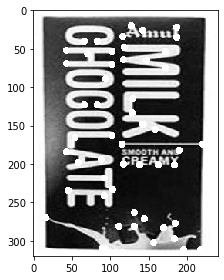

In [12]:
# Plot Keypoints
imgkp1= img_sim1[:]
for point in points:
	x = int(point[0])
	y = int(point[1])
		#rr,cc = circle_perimeter(y,x,5)
	rr,cc = circle(y,x,5)
		#imgkp[y,x] = 1.
	imgkp1[rr,cc] = 1.
skimage.io.imshow(imgkp1)# Images with keypoints plotted"""
#for point1 in points1:
#	x=int(point[0])
#	y=int(point[1])
#	rr,cc=circle(y,x,5)
#	imgkp2[rr,cc]=1
#skimage.io.imshow(imgkp2)

47
(256, 47)


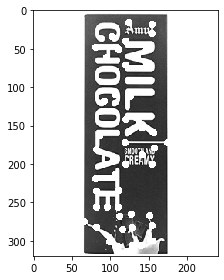

In [13]:
if __name__== "__main__":
	#img1 = skimage.io.imread("p1.png", as_grey = True)
	#img = skimage.img_as_float(img).astype(np.float32)
	#print(img.dtype)
	pts2,desc2,heatmap = model.run(img_sim2)
	points = []
	for (x,y,confidence) in zip(*pts2):
		points.append((x,y,confidence))
	#print(points)
	print(len(points)) # Number of keypoints
	print(desc2.shape) # Desc_Size X #keypoints
#plot keypoints
imgkp2= img_sim2[:]
for point in points:
	x = int(point[0])
	y = int(point[1])
		#rr,cc = circle_perimeter(y,x,5)
	rr,cc = circle(y,x,5)
		#imgkp[y,x] = 1.
	imgkp2[rr,cc] = 1.
skimage.io.imshow(imgkp2)# Images with keypoints plotted"""

84
(256, 84)


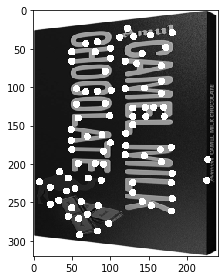

In [14]:
if __name__== "__main__":
	#img1 = skimage.io.imread("p1.png", as_grey = True)
	#img = skimage.img_as_float(img).astype(np.float32)
	#print(img.dtype)
	pts3,desc3,heatmap = model.run(img_diff)
	points= []
	for (x,y,confidence) in zip(*pts3):
		points.append((x,y,confidence))
	#print(points)
	print(len(points)) # Number of keypoints
	print(desc3.shape) # Desc_Size X #keypoints
#plot keypoints
imgkp= img_diff[:]
for point in points:
	x = int(point[0])
	y = int(point[1])
		#rr,cc = circle_perimeter(y,x,5)
	rr,cc = circle(y,x,5)
		#imgkp[y,x] = 1.
	imgkp[rr,cc] = 1.
skimage.io.imshow(imgkp)# Images with keypoints plotted"""

In [15]:
len(desc1)

256

In [16]:
len(desc2)

256

In [17]:
len(desc3)

256

In [18]:
print(desc1.shape)
print(desc2.shape)
print(desc3.shape)

(256, 52)
(256, 47)
(256, 84)


In [19]:
import numpy as np
desct1=np.transpose(desc1)
desct2=np.transpose(desc2)
desct3=np.transpose(desc3)

In [20]:
#descf1=resize(desc2,desc1.shape)
#descf2=desc1
#descf3=desc1

In [21]:
len(desct1)

52

In [37]:
from skimage.feature import (match_descriptors,plot_matches)
matches12 = match_descriptors(desct1, desct2, cross_check=True)
matches23=match_descriptors(desct2, desct3, cross_check=True)

In [38]:
len(matches12) #matches between sim1 and sim2 images

35

In [39]:
len(matches23) #matches between sim1 and diff images

25

# Run directory of folders comparison

In [25]:
import os
import gc
path = "/home/diganta/Documents/IITKGP/Project/SuperPointPretrainedNetwork-master/superdataset"
dir_list = os.listdir(path) 
  
print("Files and directories in '", path, "' :")  
  
# print the list 
print(dir_list) 

Files and directories in ' /home/diganta/Documents/IITKGP/Project/SuperPointPretrainedNetwork-master/superdataset ' :
['104', '04', '103', '23', '11', '17', '102', '20', '07', '02', '25', '14', '12', '27', '22', '03', '24', '100', '15', '08', '101', '10', '18', '28', '09', '19', '16', '05', '26', '01', '13', '21', '06']


In [26]:
def get_kpts(img):
    
    pts, desc, heatmap = model.run(img)
    
    points = []
    for (x,y,confidence) in zip(*pts):
        points.append((x,y))
    
    return points, desc, heatmap

In [27]:
def plot_superpoint(img):
    kps,descriptors,hm = get_kpts(img)
    print(len(kps))
    imgkp = img[:]
    for point in kps:
        x = int(point[0])
        y = int(point[1])
        #rr,cc = circle_perimeter(y,x,5)
        rr,cc = circle(y,x,5)
        #imgkp[y,x] = 1.
        imgkp[rr,cc] = 1.
    plt.imshow(imgkp, cmap=plt.cm.gray)
    plt.show()

In [46]:
def compare_superpoint(img1, img2):
    kps1,desc1,hm1 = get_kpts(img_sim1)
    kps2,desc2,hm2 = get_kpts(img_sim2)
    kps3,desc3,hm3=get_kpts(img_diff)
    return kps1,kps2,desc1,desc2

104
47


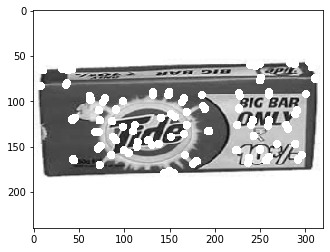

28


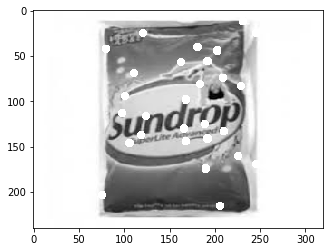

04
47


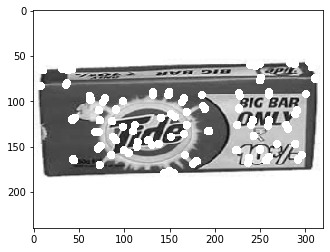

37


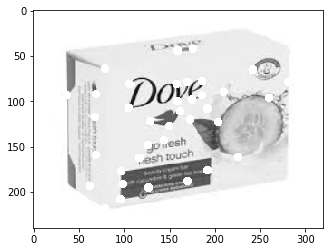

103
47


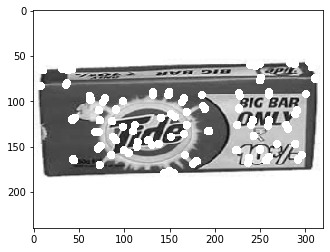

38


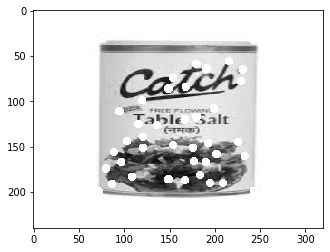

23
47


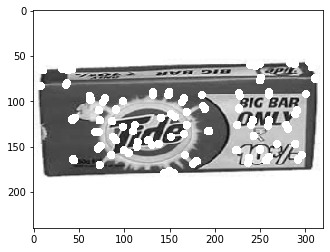

67


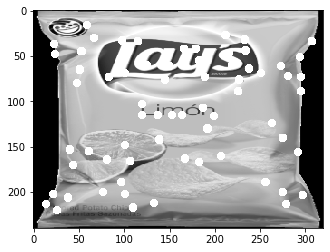

11
47


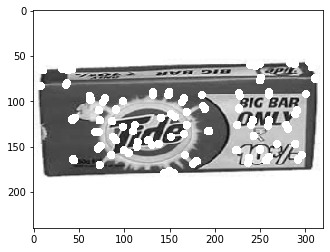

60


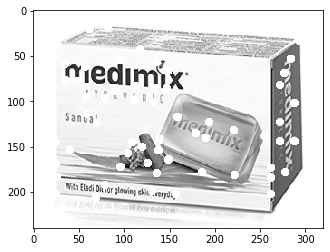

17
47


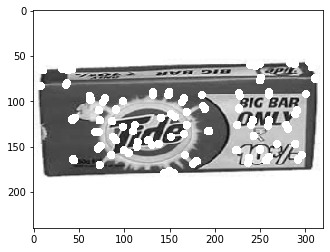

71


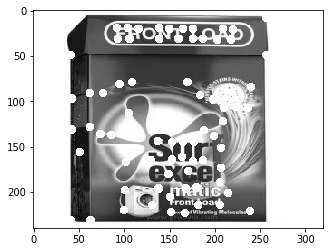

102
47


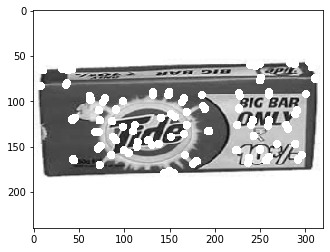

21


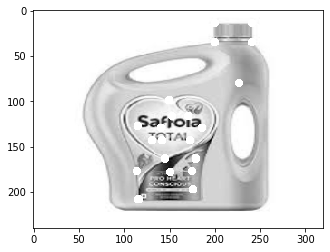

20
47


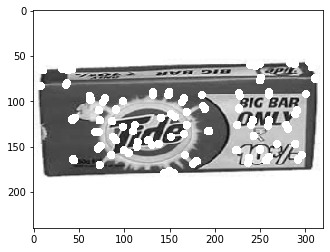

24


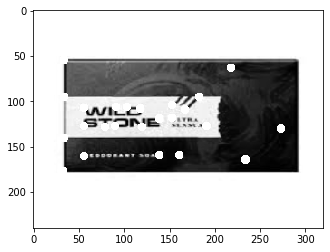

07
47


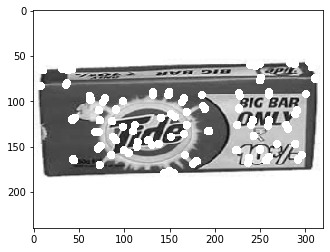

31


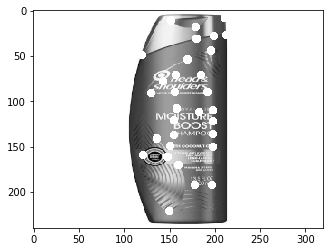

02
47


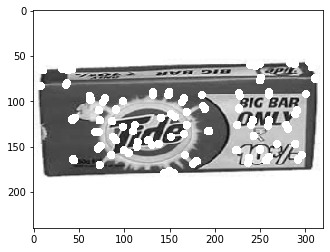

13


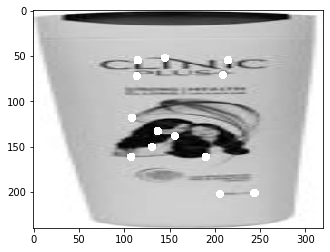

25
47


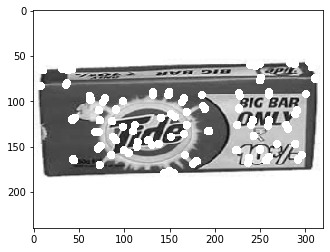

52


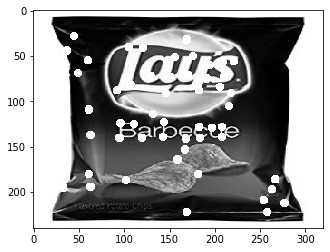

14
47


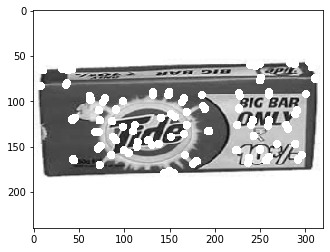

41


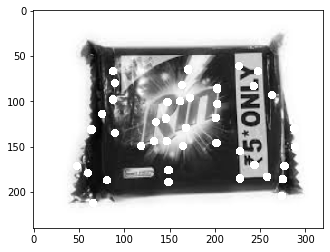

12
47


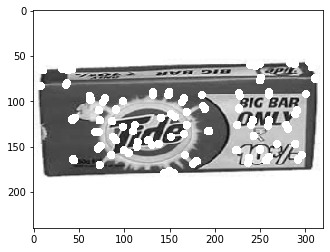

28


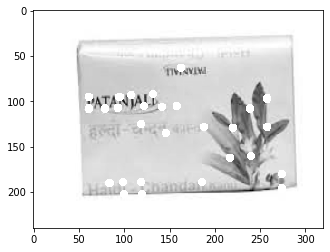

27
47


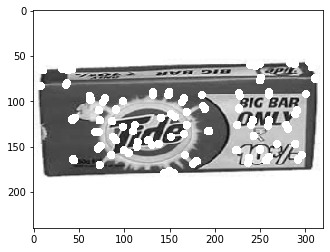

64


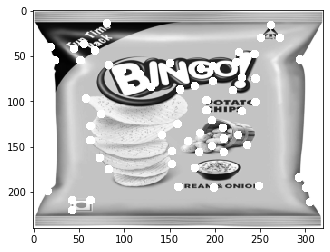

22
47


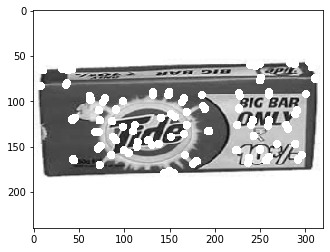

49


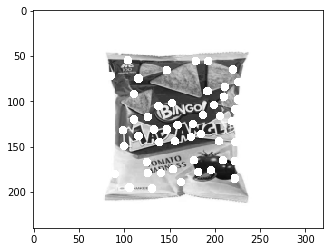

03
47


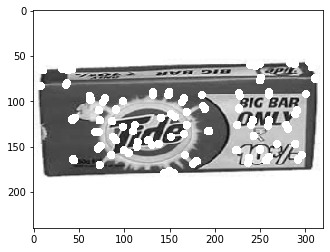

29


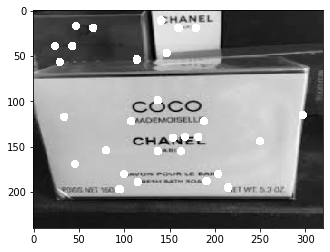

24
47


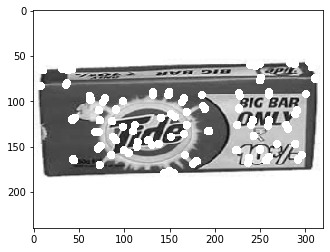

58


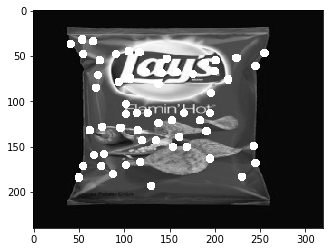

100
47


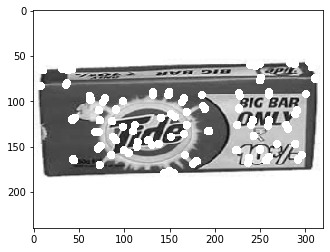

59


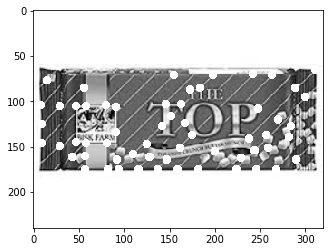

15
47


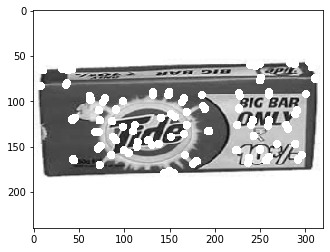

41


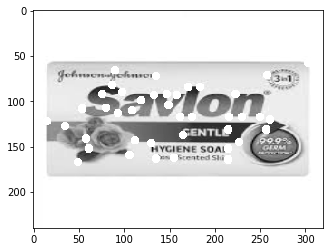

08
47


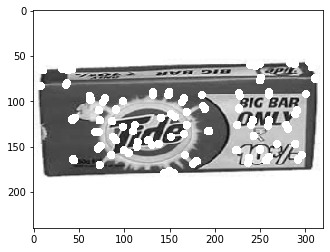

14


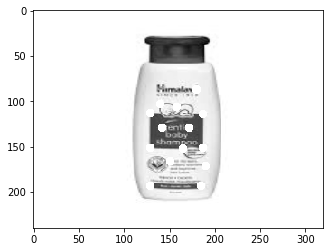

101
47


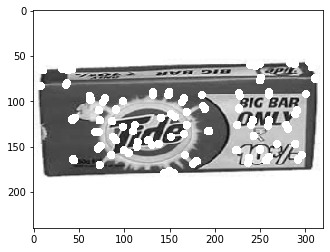

20


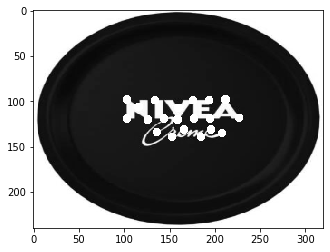

10
47


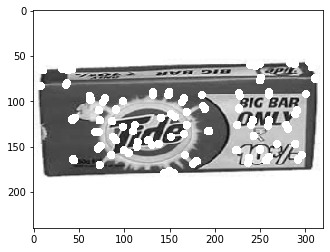

43


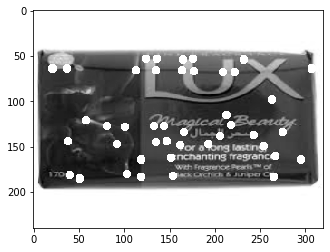

18
47


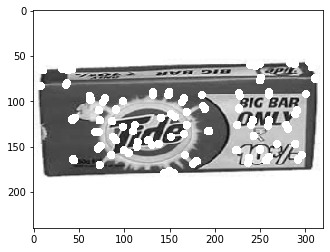

31


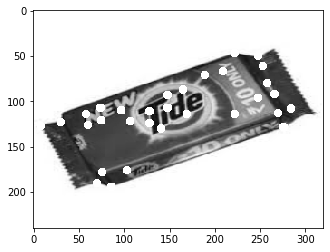

28


ValueError: Could not find a format to read the specified file in mode 'i'

In [47]:
kp_diff = []
kp_sim1 = []
for dirname in os.listdir(path):
    print(dirname)
    dir_nm = os.path.join(path, dirname)
    torch.cuda.empty_cache()
    if os.path.isdir(dir_nm):
        diff = os.path.join(dir_nm, os.listdir(dir_nm)[0])
        sim1 = os.path.join(dir_nm, os.listdir(dir_nm)[1])
        sim2 = os.path.join(dir_nm, os.listdir(dir_nm)[2])
        img_diff = resize(skimage.io.imread(diff, as_gray = True),(240,320))
        sim1_img = resize(skimage.io.imread(sim1, as_gray = True),(240,320))
        sim2_img = resize(skimage.io.imread(sim2, as_gray = True),(240,320))


        img_diff= skimage.img_as_float(diff_img).astype(np.float32)
        sim1_img= skimage.img_as_float(sim1_img).astype(np.float32)
        sim2_img= skimage.img_as_float(sim2_img).astype(np.float32)
        
        kp_diff.append(plot_superpoint(img_diff))
        gc.collect()
        kp_sim1.append(plot_superpoint(sim1_img))
        gc.collect()
        
        
        compare_superpoint(sim1_img, sim2_img)
        compare_superpoint(sim1_img, img_diff)